<a href="https://colab.research.google.com/github/cyberdreams8/water-quality-analysis-and-prediction/blob/main/PDS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##READING DATASET

In [100]:
url12 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202012.csv'
D12 = pd.read_csv(url12)
url13 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202013.csv'
D13 = pd.read_csv(url13)
url14 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202014.csv'
D14 = pd.read_csv(url14)
url15 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202015.csv'
D15 = pd.read_csv(url15)
url16 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202016.csv'
D16 = pd.read_csv(url16)
url17 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202017.csv'
D17 = pd.read_csv(url17)
url18 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202018.csv'
D18 = pd.read_csv(url18)
url19 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202019.csv'
D19 = pd.read_csv(url19)
url21 = 'https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction/refs/heads/main/Ground%20Water%202021.csv'
D21 = pd.read_csv(url21)

##CONCAT DATA

In [101]:
# Concatenate all DataFrames
frames = [D12, D13, D14, D15, D16, D17, D18, D19, D21]
Dataset = pd.concat(frames)

# Display the combined DataFrame
Dataset

,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012
1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012
2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012
3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012
4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012
...,...,...,...,...,...,...,...,...,...,...
983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021
984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021
985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021
986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021


In [102]:
# Adding a new column 'Potability' to indicate whether the water is drinkable based on pH and Conductivity thresholds

# Define safe ranges
ph_min_safe, ph_max_safe = 6.5, 8.5
conductivity_max_safe = 500

# Create the 'Potability' column based on the conditions
Dataset['Potability'] = ((Dataset['pH Min'] >= ph_min_safe) & (Dataset['pH Max'] <= ph_max_safe) &
                      (Dataset['Conductivity (µmhos/cm) Max'] < conductivity_max_safe))

# Convert boolean to categorical values ("Drinkable" or "Not Drinkable")
Dataset['Potability'] = Dataset['Potability'].apply(lambda x: 'Drinkable' if x else 'Not Drinkable')

# Display the updated dataframe to confirm
Dataset[['Station Code', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Max', 'Potability']].head()
Dataset

,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Potability
0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,Drinkable
1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,Not Drinkable
2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,Not Drinkable
3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,Not Drinkable
4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...
983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,Not Drinkable
984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,Not Drinkable
985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,Not Drinkable
986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,Not Drinkable


##SANITY CHECK OF DATA

In [103]:
#shape
Dataset.shape

(6316, 11)

In [104]:
#info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 987
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Code                 6240 non-null   float64
 1   Station Name                 6267 non-null   object 
 2   STATE                        6241 non-null   object 
 3   Temperature Min              5818 non-null   float64
 4   Temperature Max              5818 non-null   float64
 5   pH Min                       6195 non-null   float64
 6   pH Max                       6195 non-null   float64
 7   Conductivity (µmhos/cm) Min  6124 non-null   float64
 8   Conductivity (µmhos/cm) Max  6124 non-null   float64
 9   Year                         6316 non-null   int64  
 10  Potability                   6316 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 592.1+ KB


In [105]:
#finding missing values
Dataset.isnull().sum()

,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192
Year,0


In [106]:
#percentage of missing value
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899
Year,0.000000


In [107]:
#finding duplicates
Dataset.duplicated().sum()

47

In [108]:
# Identifying garbage values
for i in Dataset.select_dtypes(include="object").columns:
    print(Dataset[i].value_counts())
    print("***"*10)

Station Name
BEGUSARAI                                                                                    10
PATNA                                                                                        10
FULBARI BARRAGE                                                                               9
NANGAL, PUNJAB                                                                                9
VISVA BHARATI                                                                                 9
                                                                                             ..
HAND PUMP WATER NEAR D.M OFFICE, MADHEPURA                                                    1
HAND PUMP WATER AT COLLECTRIATE OFFICE, MADHUBANI                                             1
TAP WATER INSIDE THE CAMPUS OF TOURIST CAFETERIA,\nNALANDA                                    1
HAND PUMP WATER AT CIVIL COURT, NALANDA                                                       1
GROUND WATER AT BHAGWAN\nIN

In [109]:
Dataset

,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Potability
0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,Drinkable
1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,Not Drinkable
2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,Not Drinkable
3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,Not Drinkable
4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...
983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,Not Drinkable
984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,Not Drinkable
985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,Not Drinkable
986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,Not Drinkable


##EXPLORATORY DATA ANALYSIS(EDA)

In [110]:
Dataset.columns

Index(['Station Code', 'Station Name', 'STATE', 'Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max', 'Year', 'Potability'],
      dtype='object')

In [111]:
#descriptive statistics
columns = ['Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max']
selected_data = Dataset[columns]
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature Min,5818.0,25.243589,4.694067,0.0,23.00,26.00,28.00,67.0
Temperature Max,5818.0,27.175799,4.515805,0.0,25.00,28.00,30.00,70.0
pH Min,6195.0,7.155052,0.698224,0.0,6.90,7.20,7.60,9.6
pH Max,6195.0,7.631516,8.849163,4.6,7.20,7.51,7.90,702.0
Conductivity (µmhos/cm) Min,6124.0,1303.856199,3102.087896,0.0,294.00,680.00,1338.50,72683.0
Conductivity (µmhos/cm) Max,6124.0,1728.061300,3725.717739,0.0,415.75,895.00,1748.25,87790.0


In [112]:
selected_data2 = Dataset[['STATE','Potability']]
selected_data2.describe().T

,count,unique,top,freq
STATE,6241,53,RAJASTHAN,585
Potability,6316,2,Not Drinkable,5197


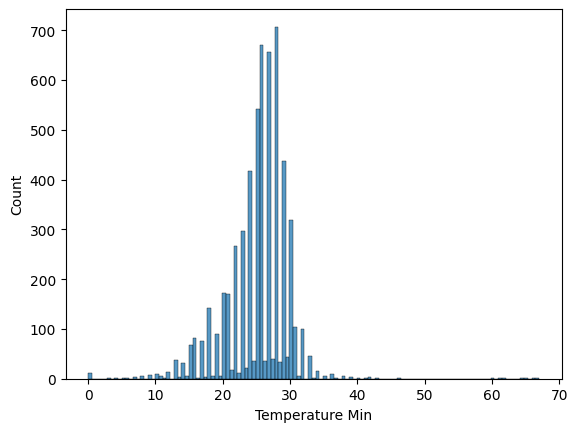

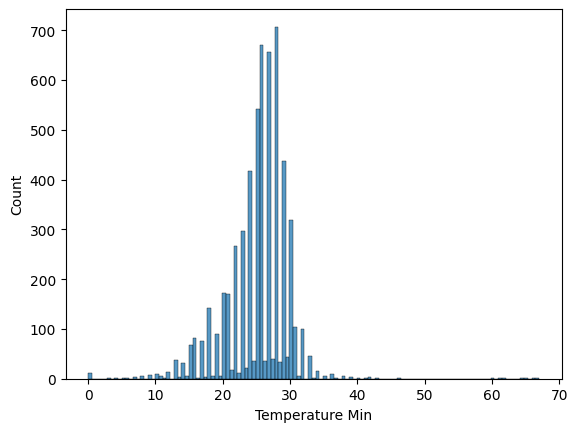

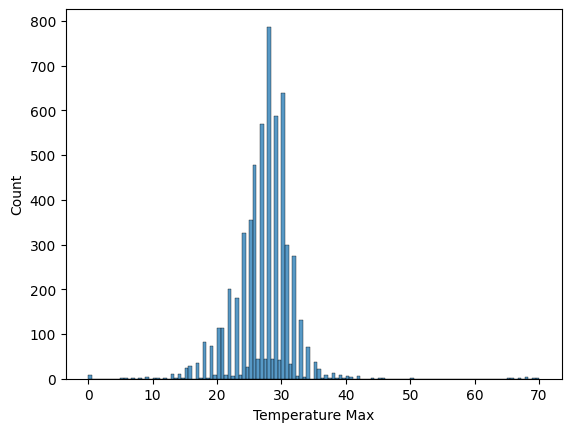

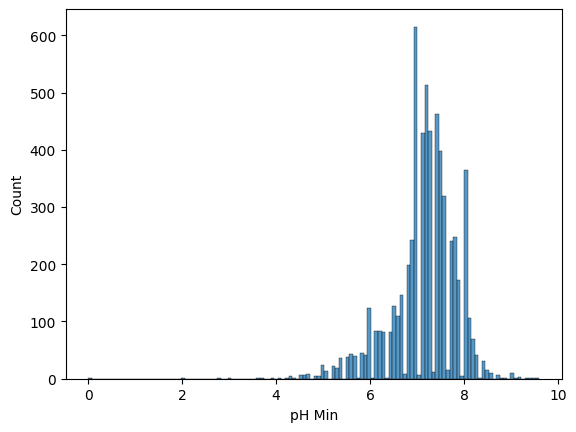

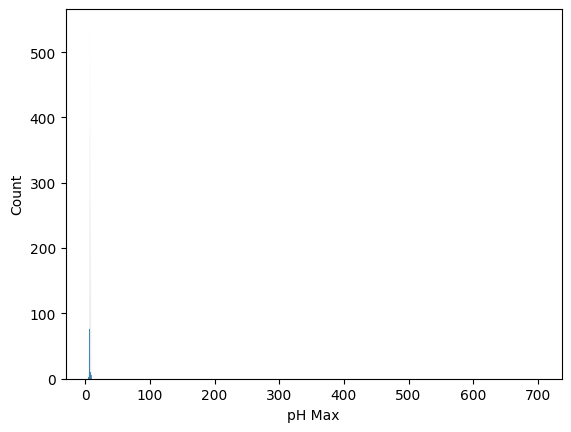

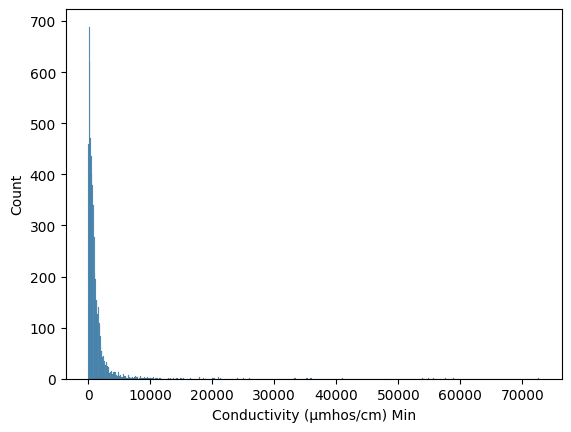

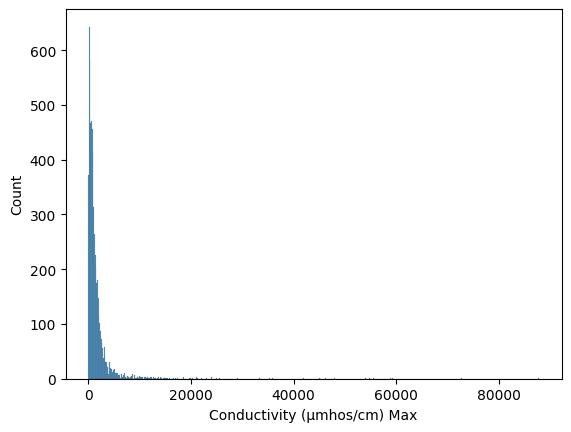

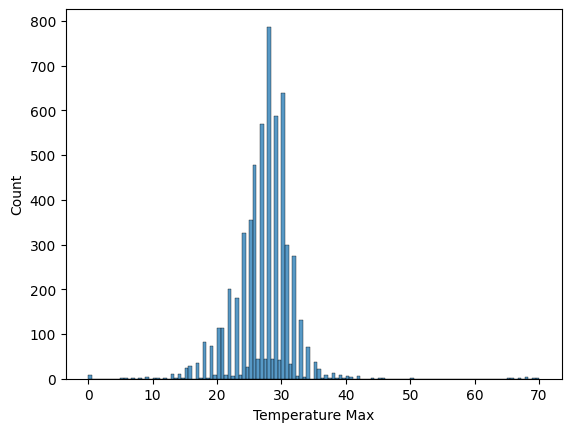

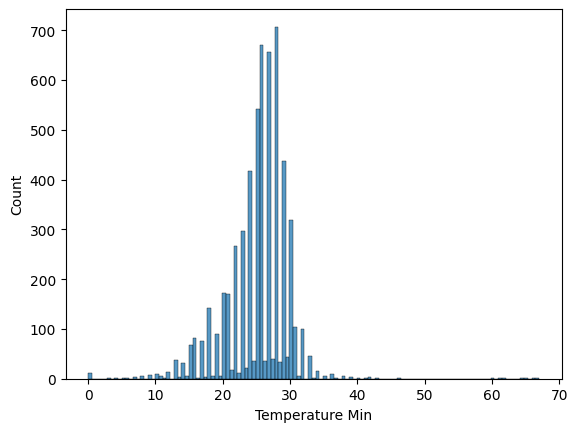

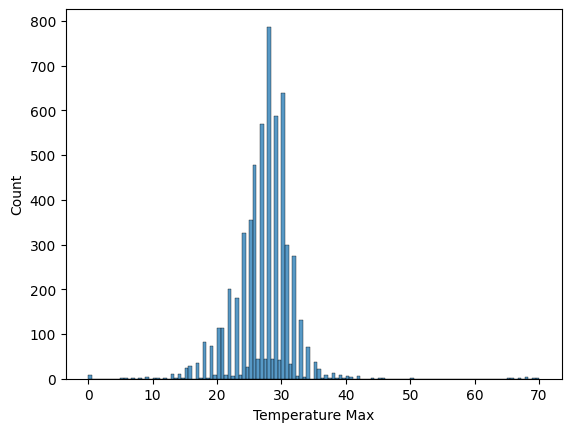

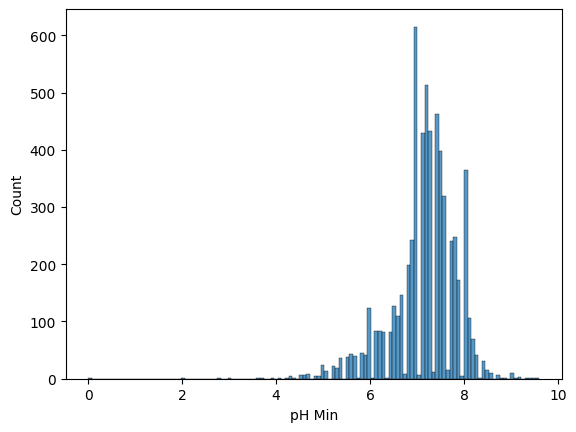

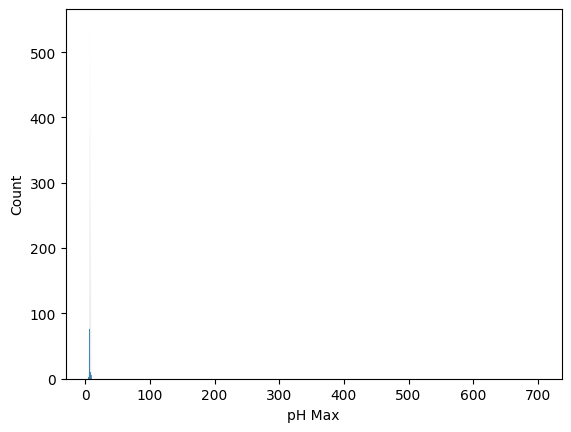

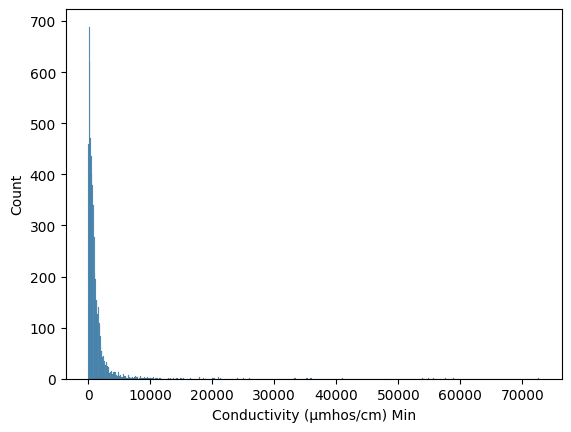

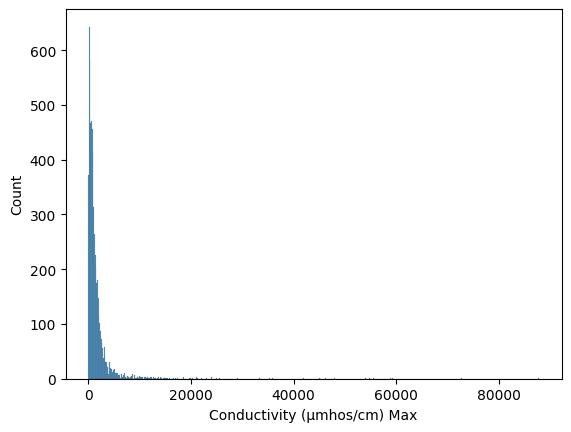

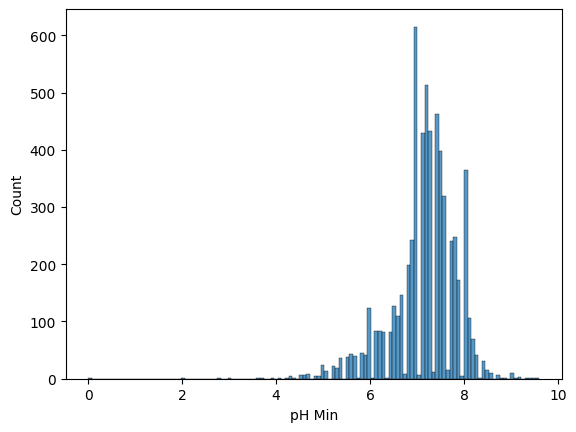

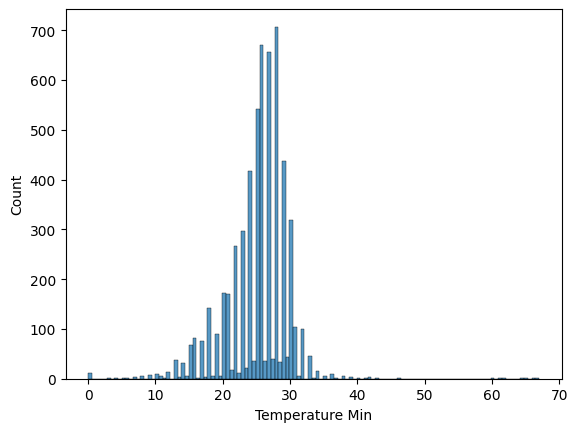

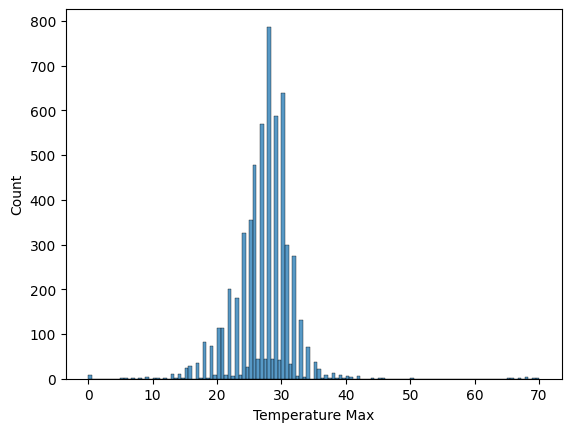

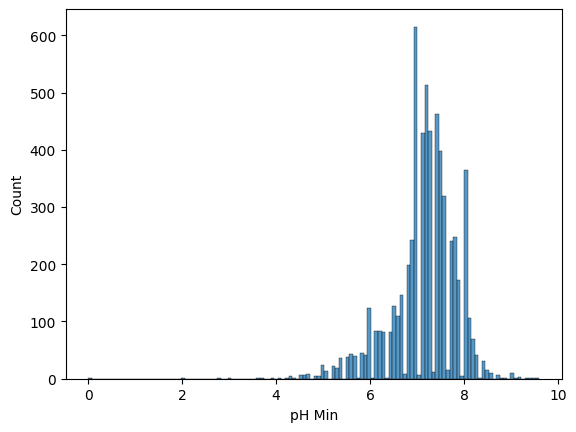

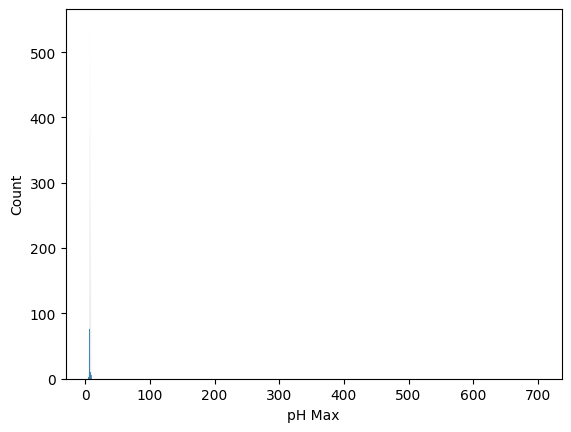

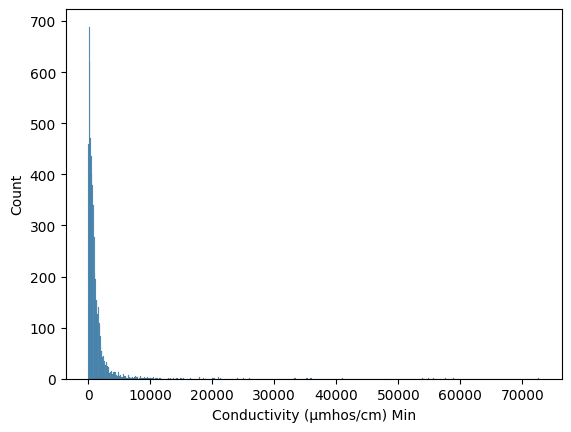

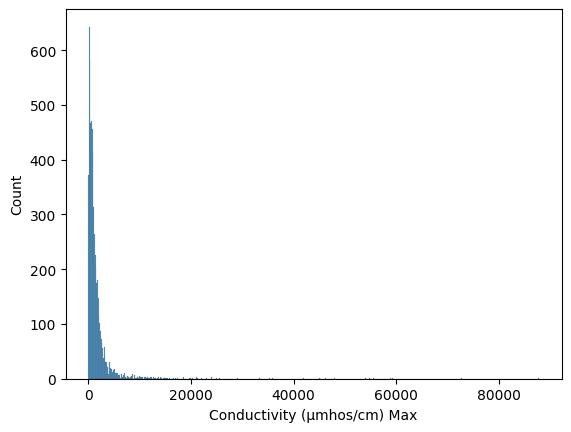

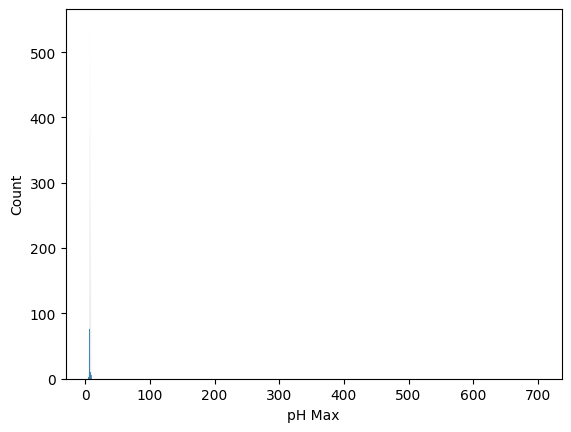

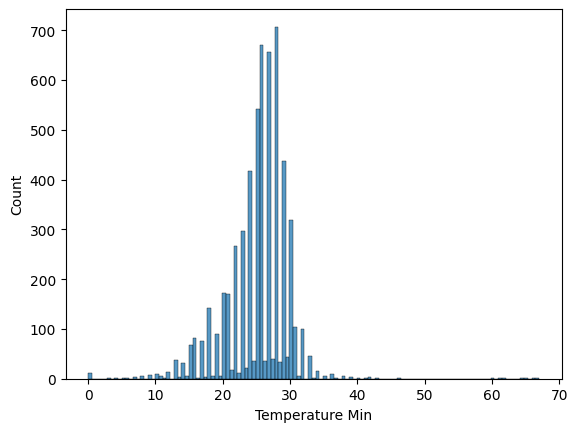

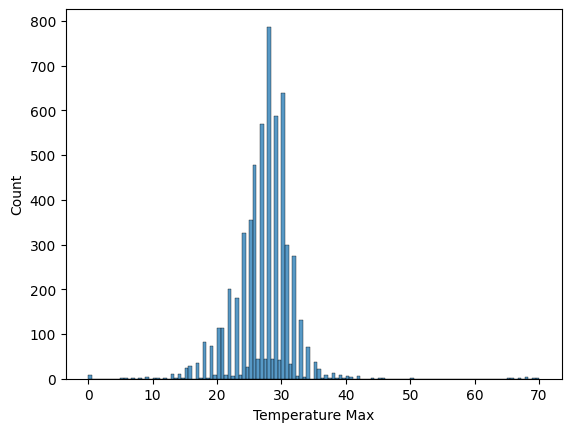

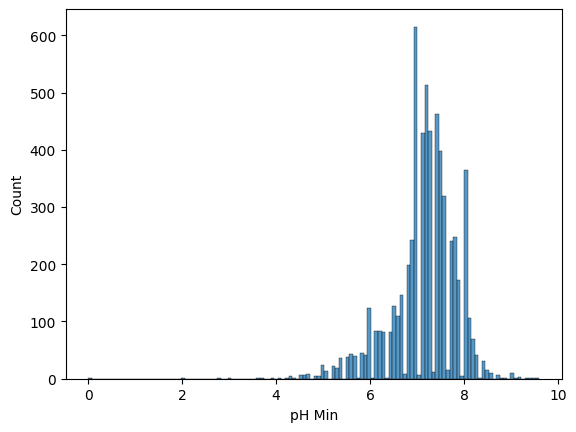

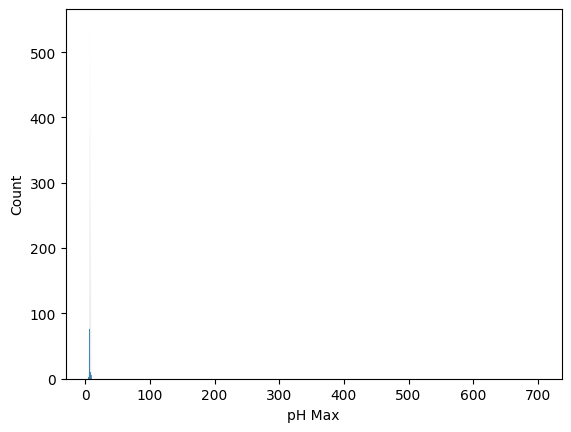

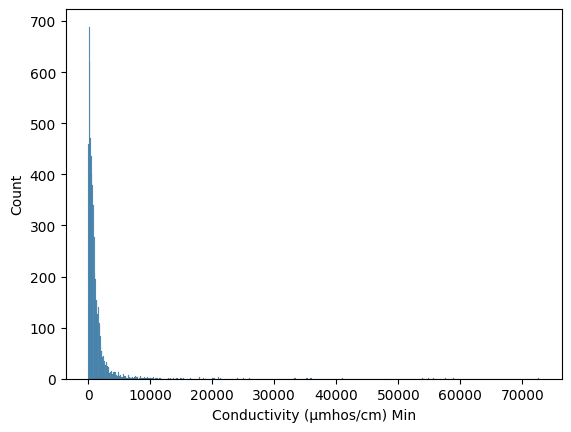

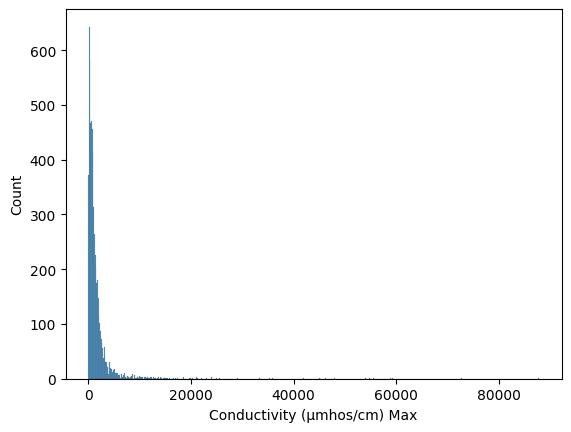

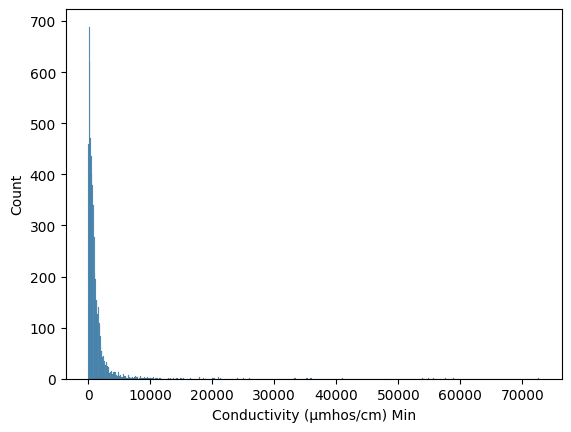

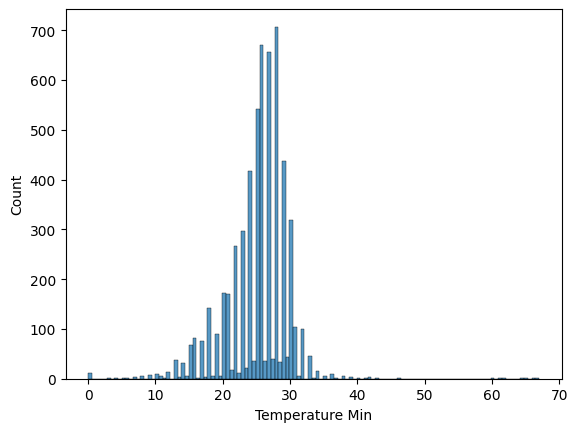

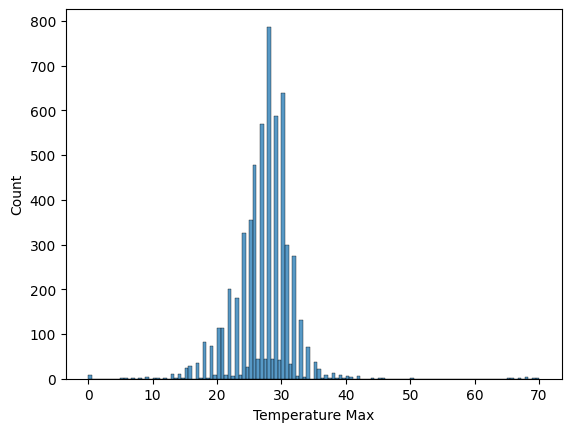

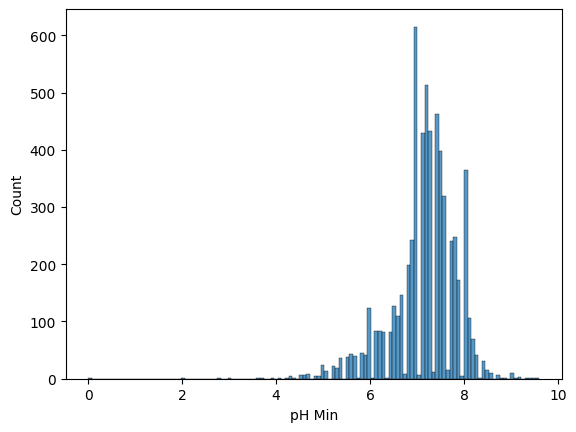

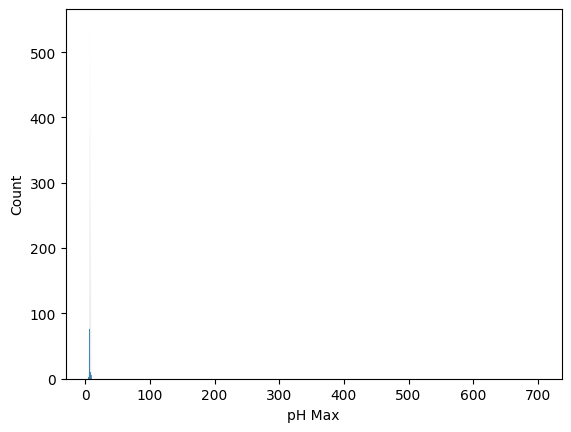

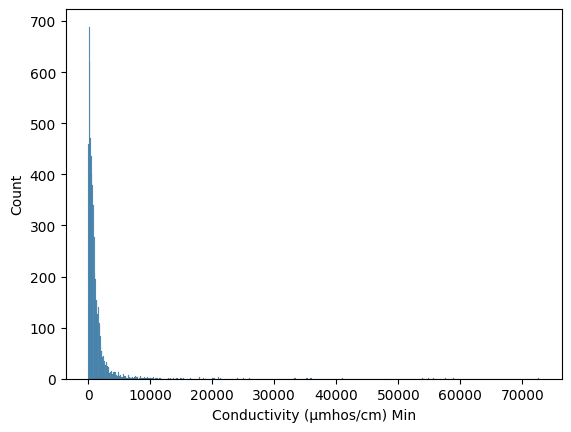

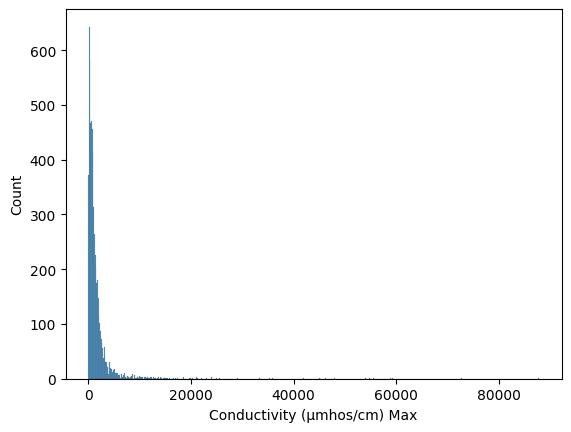

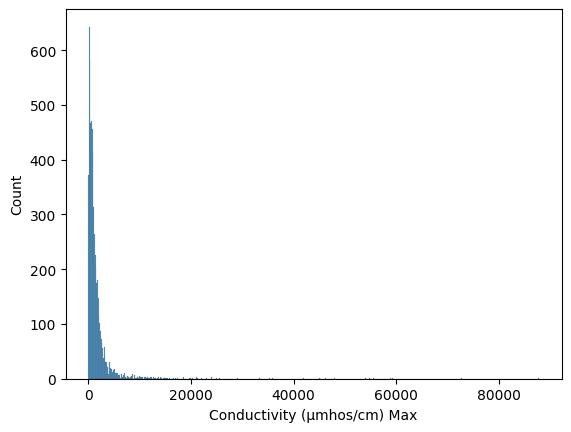

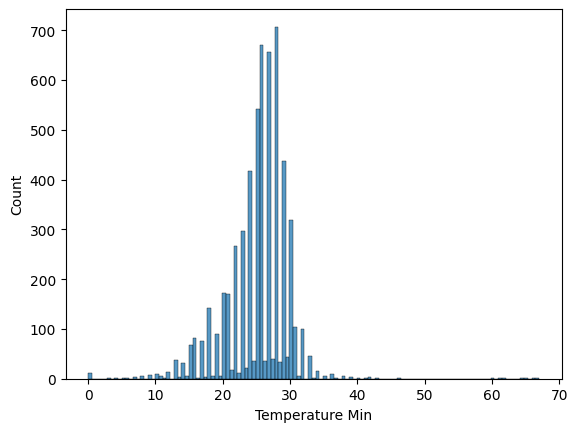

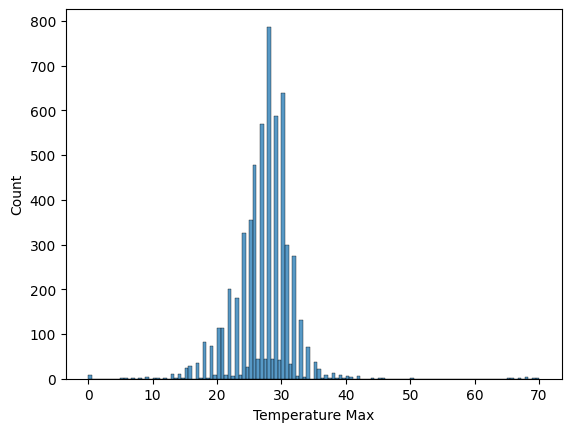

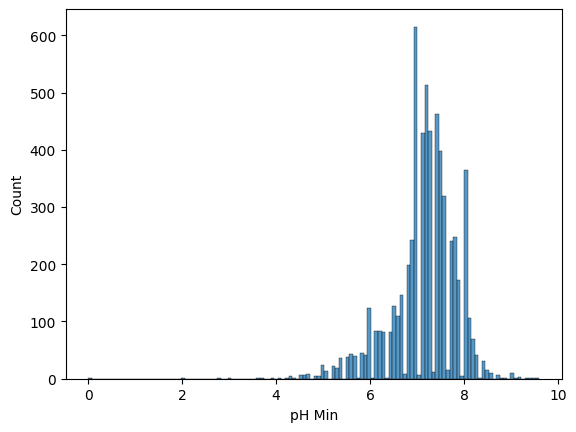

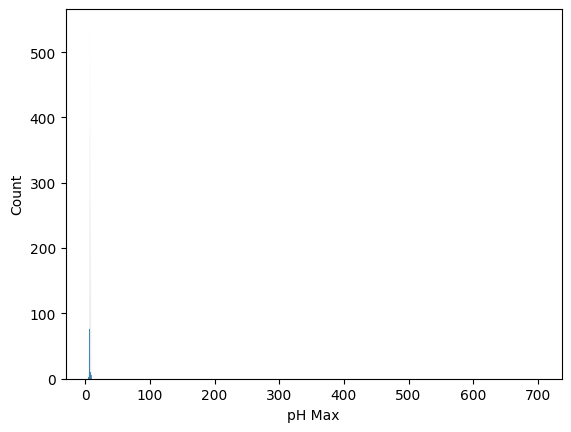

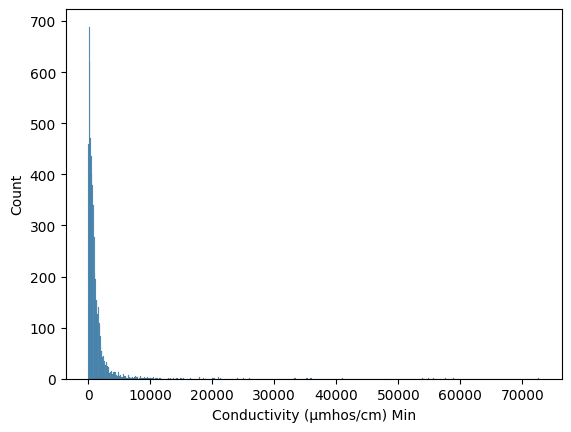

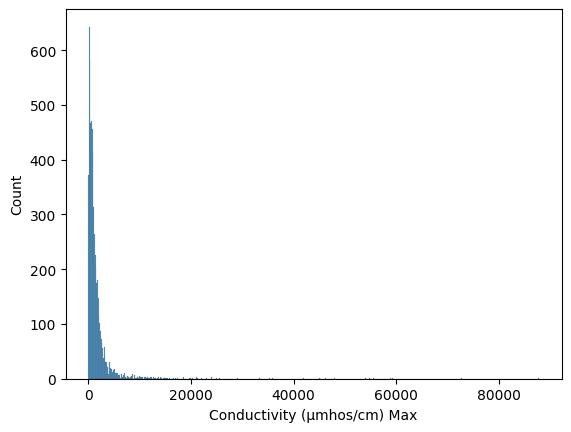

In [113]:
#histogram to understand the distribution
for i in selected_data.select_dtypes(include='number').columns:
  # Reset index before plotting to avoid duplicate index error
  sns.histplot(data=selected_data.reset_index(), x=i)
  plt.show()

  for i in selected_data.select_dtypes(include='number').columns:
  # Reset index before plotting to avoid duplicate index error
    sns.histplot(data=selected_data.reset_index(), x=i)
    plt.show()

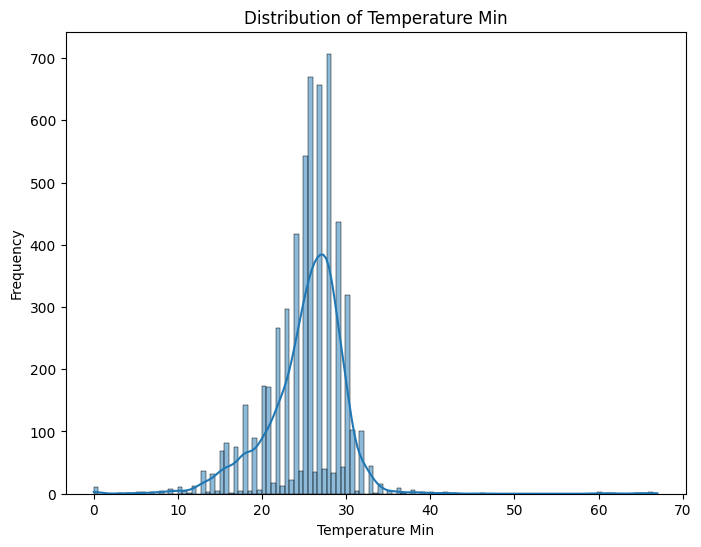

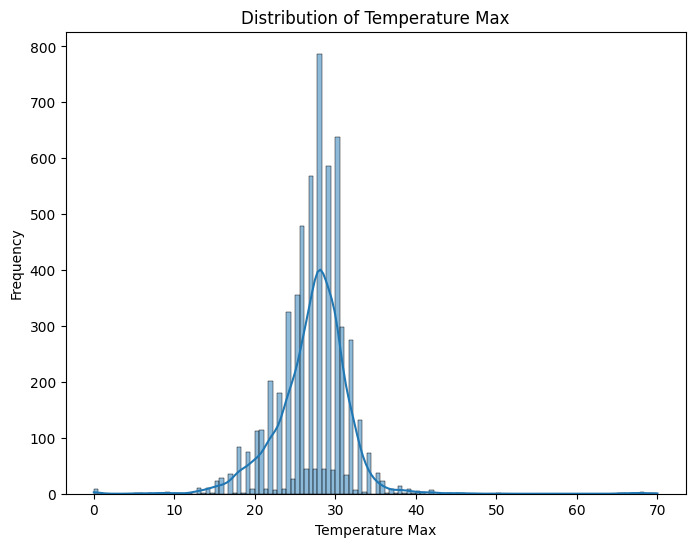

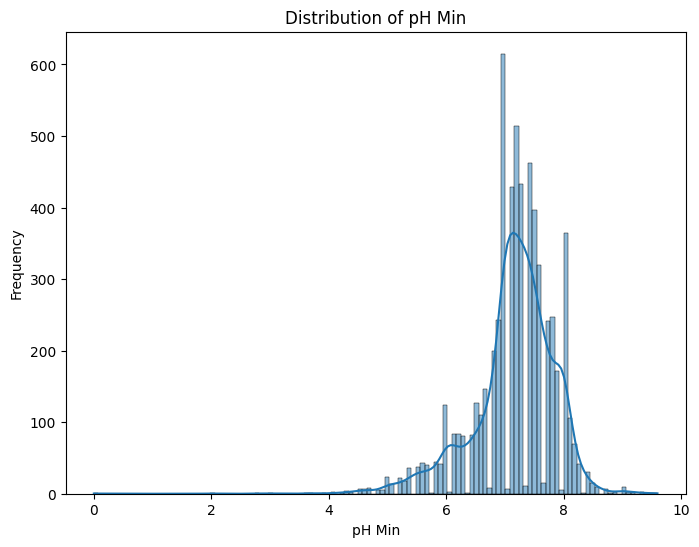

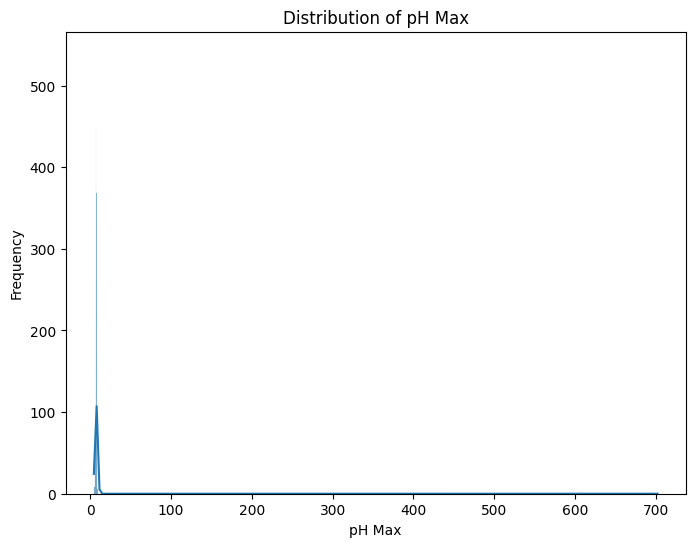

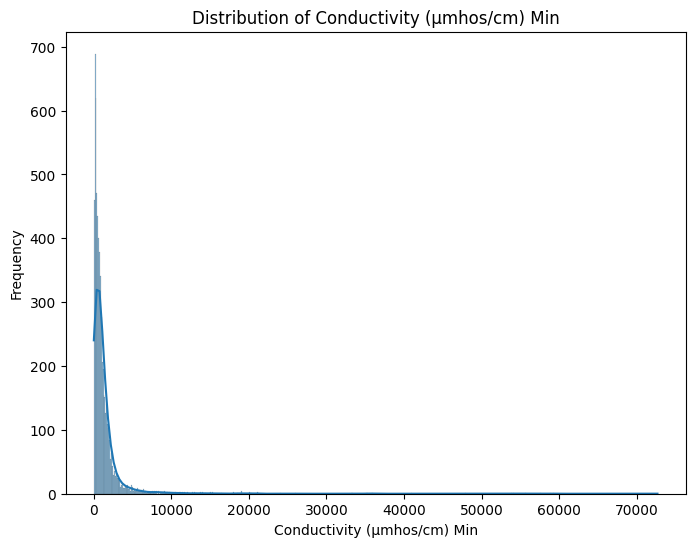

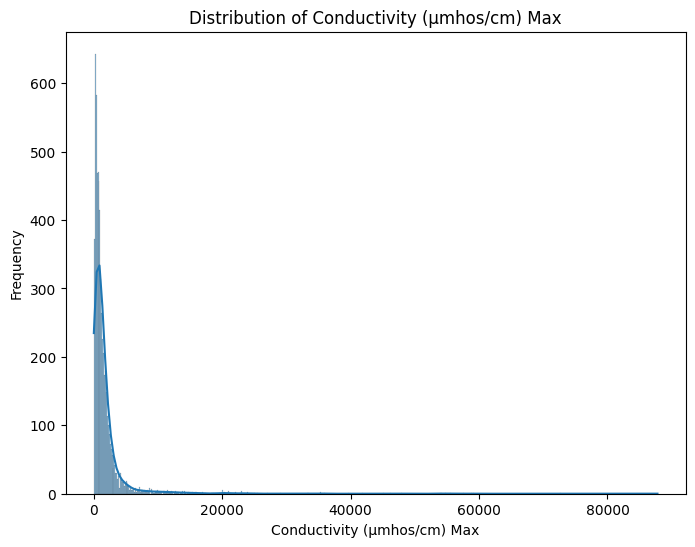

In [115]:
#histogram to understand the distribution
# Select numerical features for plotting, excluding 'Station Code' and 'Year'
numerical_features = Dataset.select_dtypes(include=['number']).columns
numerical_features = numerical_features[~numerical_features.isin(['Station Code', 'Year'])]  # Exclude 'Station Code' and 'Year'


# Iterate through each numerical feature and plot histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    # Fix: Reset index before plotting to avoid duplicate index error
    sns.histplot(data=Dataset.reset_index(), x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

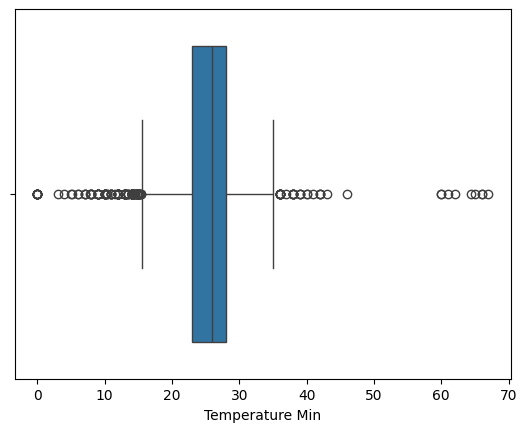

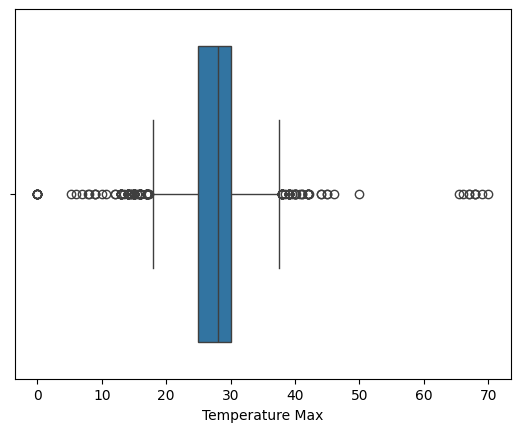

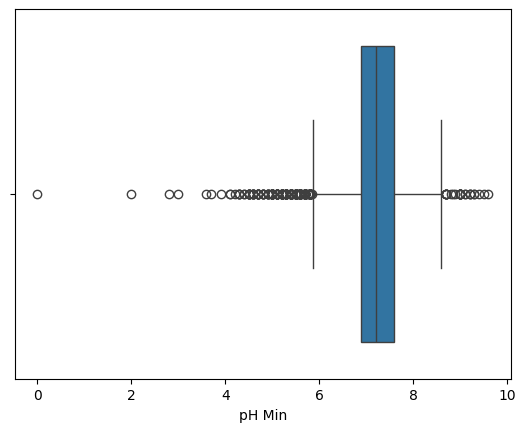

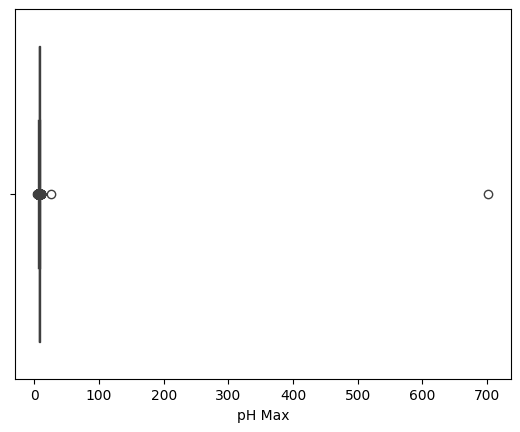

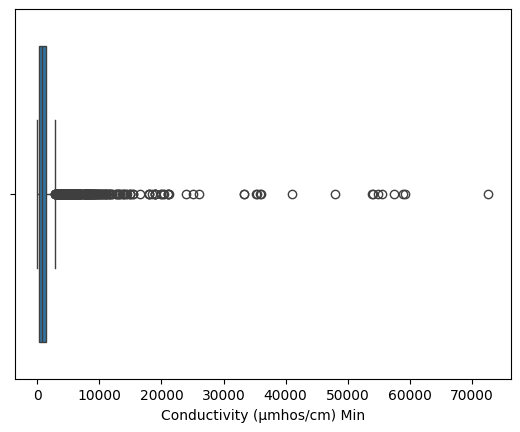

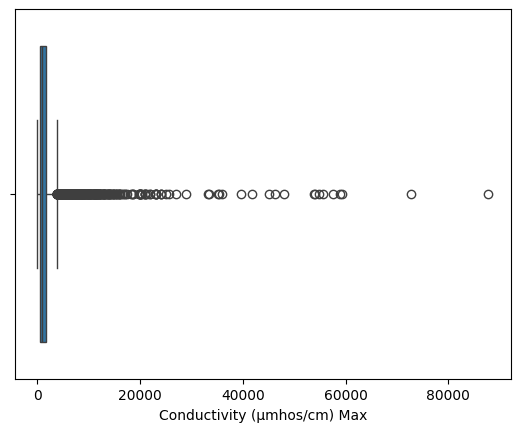

In [116]:
#Boxplot to indentify Outlier
import warnings
warnings.filterwarnings('ignore')
for i in selected_data.select_dtypes(include='number').columns:
  # Reset index before plotting to avoid duplicate index error
  sns.boxplot(data=selected_data.reset_index(), x=i)
  plt.show()

To determine if water is drinkable, you can use a combination of quality parameters (like pH, conductivity, and temperature) aligned with guidelines from the World Health Organization (WHO) or national standards. Here’s a basic approach:

1. pH Level
Ideal Range for Drinking Water: Typically between 6.5 and 8.5.
Interpretation: Water with a pH outside this range may have undesirable taste, be corrosive, or leach metals from pipes, making it potentially unsafe.
2. Conductivity (µmhos/cm)
Ideal Range for Drinking Water: Generally less than 500 µS/cm.
Interpretation: High conductivity indicates a high concentration of dissolved solids, often due to salts, which can make water unpalatable and potentially unsafe over long-term consumption.
3. Temperature
Ideal Range: Not directly tied to potability, but for practical and taste reasons, temperatures around 5-15°C are preferred.
Interpretation: Higher temperatures can accelerate microbial growth, but temperature alone isn’t typically used to determine potability.
Formula for Drinkability
A basic decision rule could be:

Drinkable
=
(
pH between 6.5 and 8.5
)

AND

(
Conductivity
<
500

𝜇
S/cm
)
Drinkable=(pH between 6.5 and 8.5)AND(Conductivity<500μS/cm)
This formula would classify water as "drinkable" if both the pH and conductivity fall within safe ranges. You can also add additional conditions if other contaminants are measured.

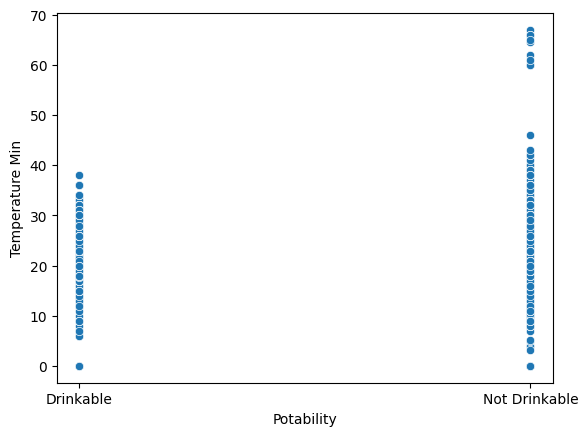

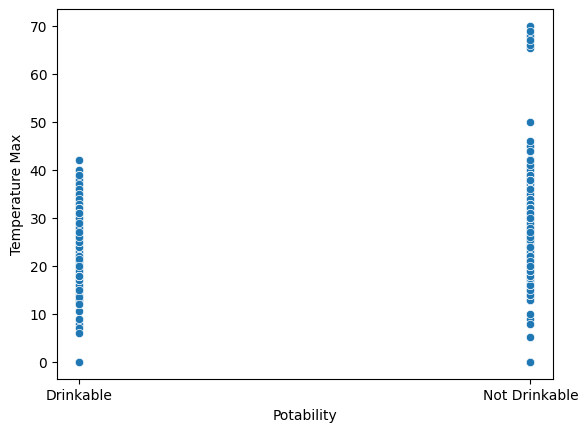

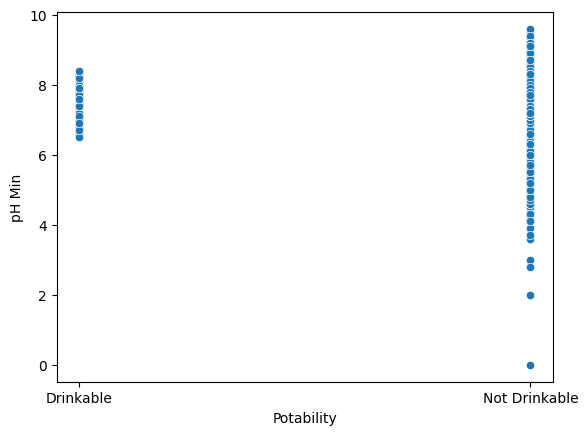

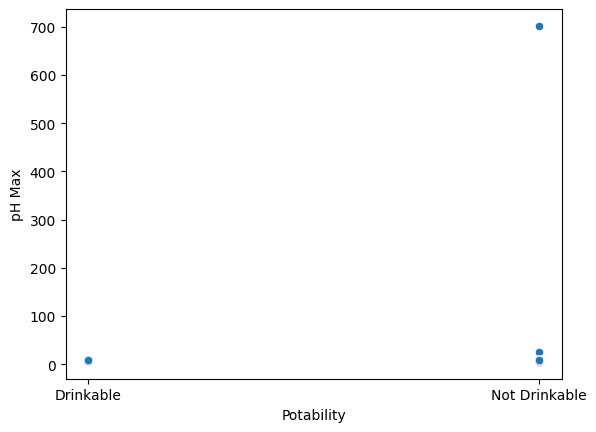

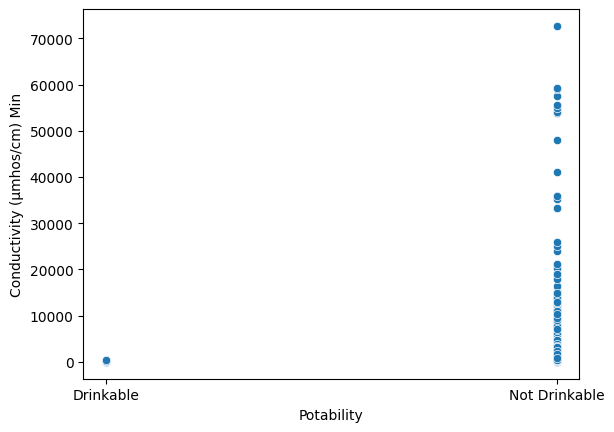

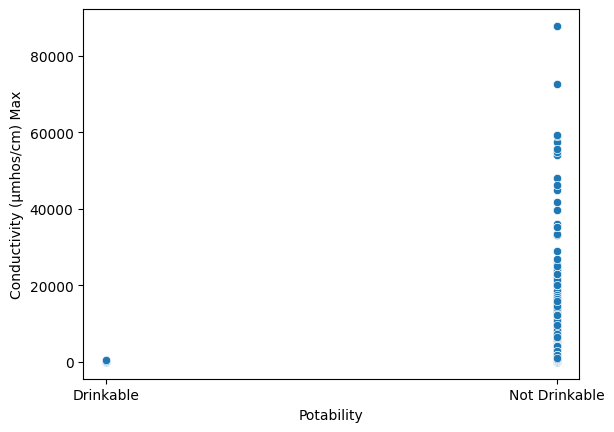

In [117]:
#scatter plot to understand the relationship
# Reset index before plotting to avoid duplicate index error, drop the old index
Dataset = Dataset.reset_index(drop=True)
for i in ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']:
  sns.scatterplot(data=Dataset, x='Potability', y=i)
  plt.show()

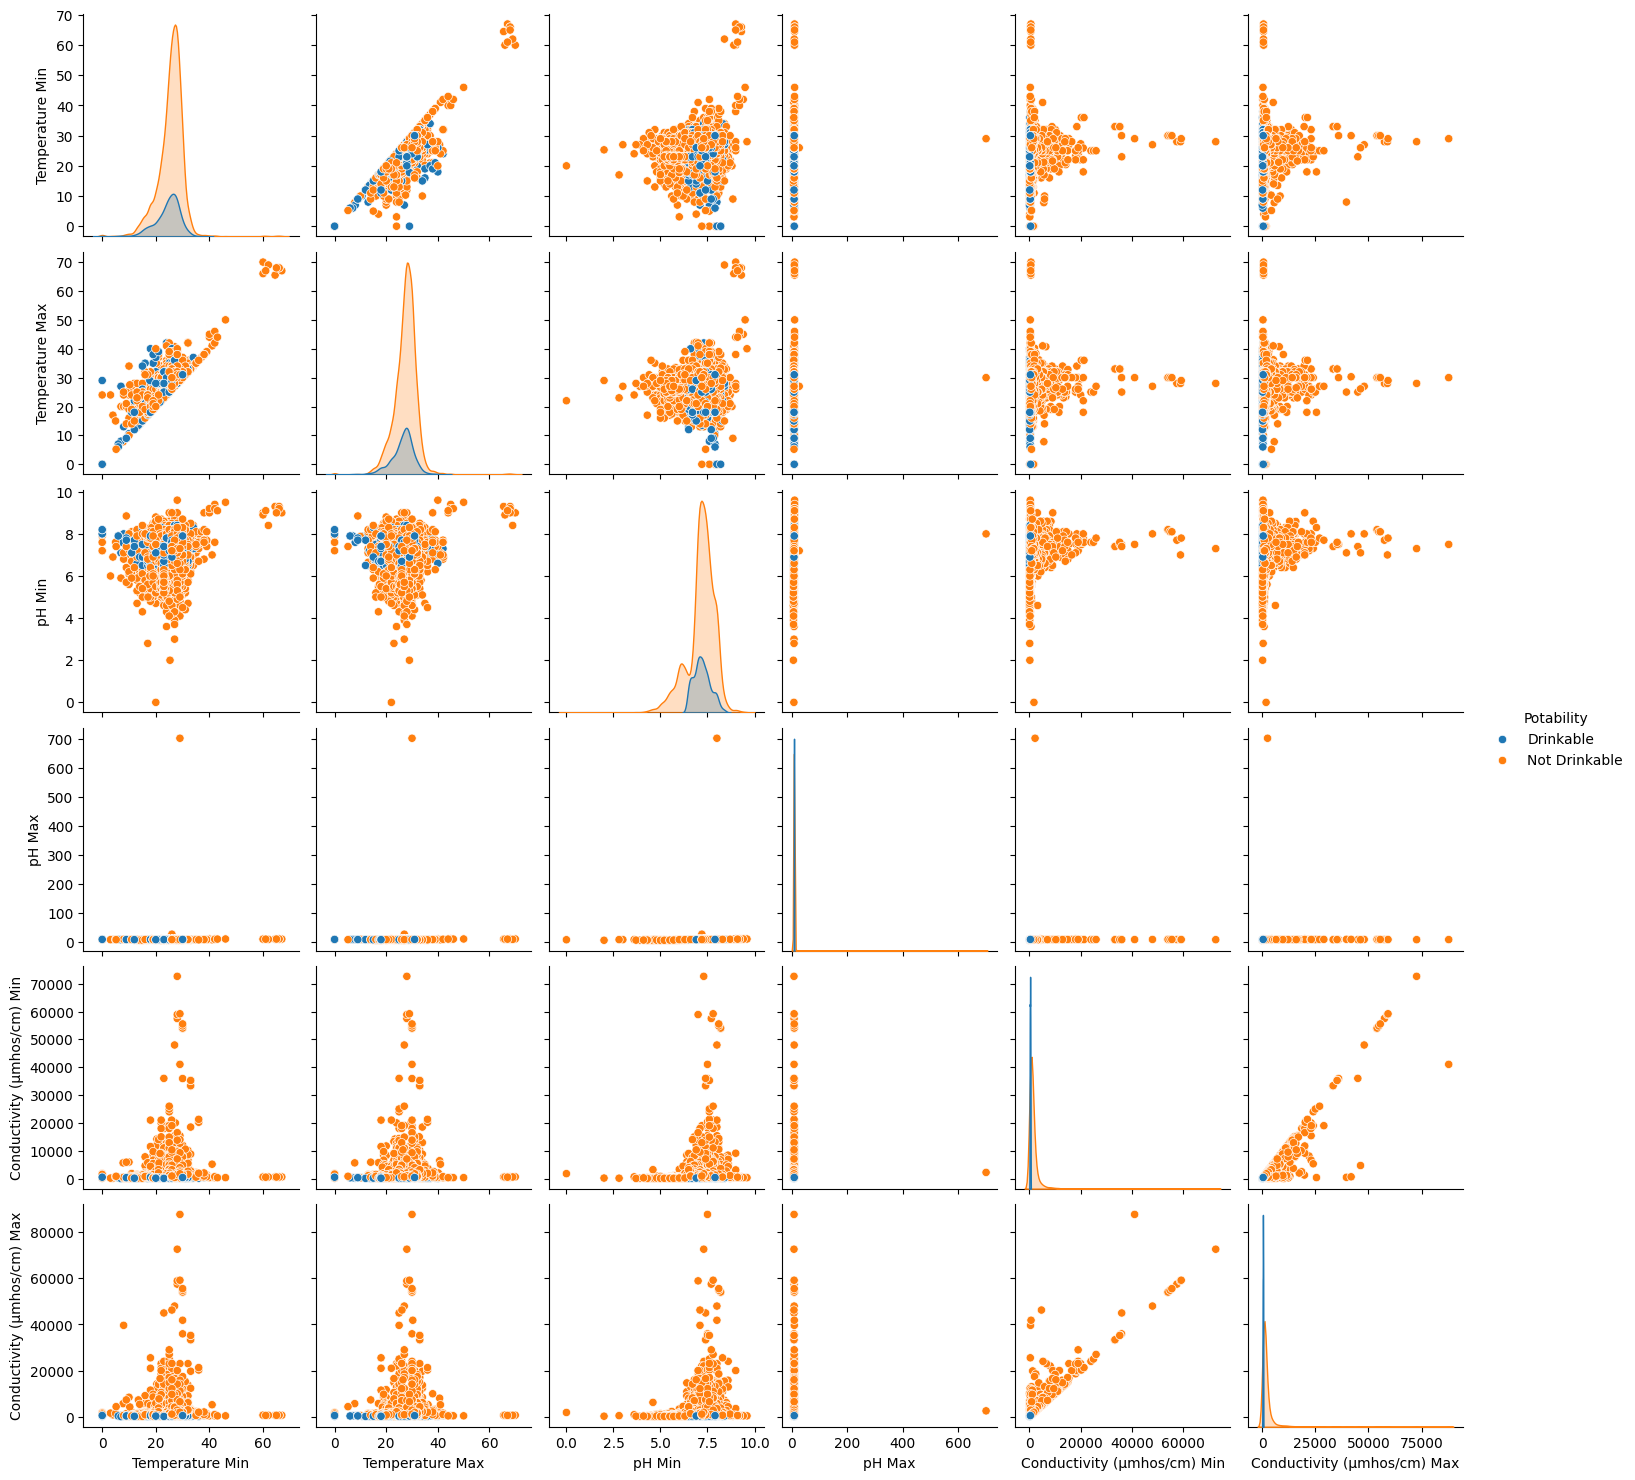

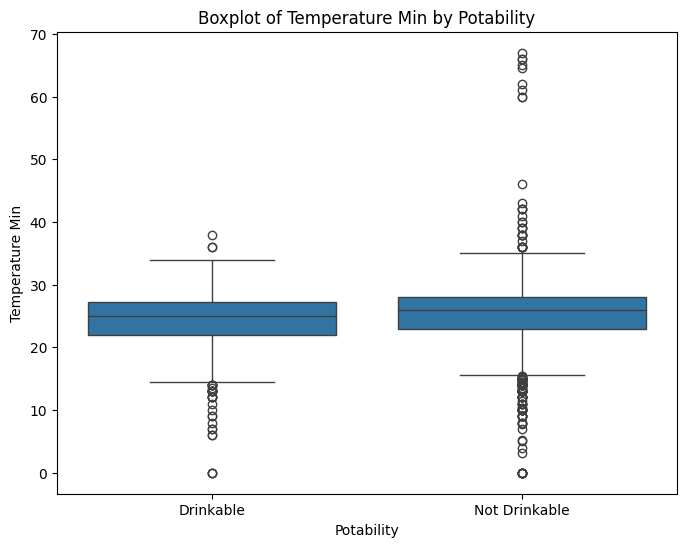

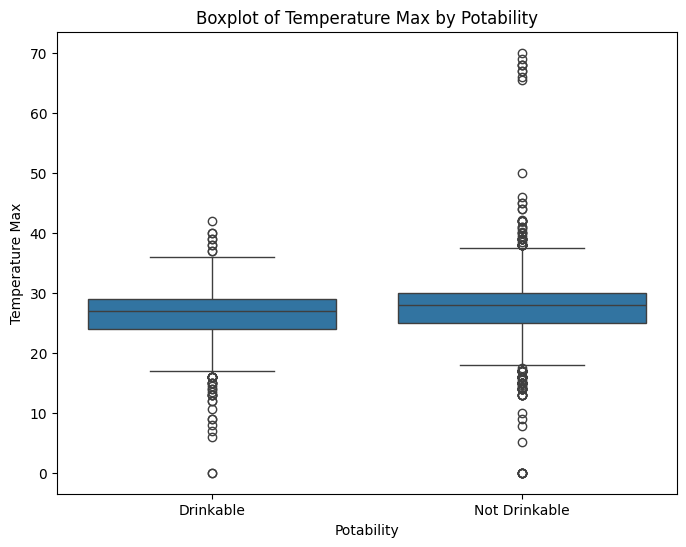

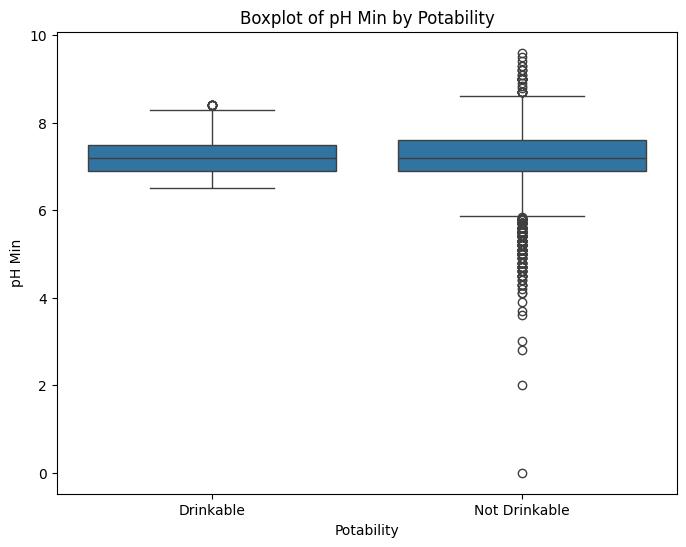

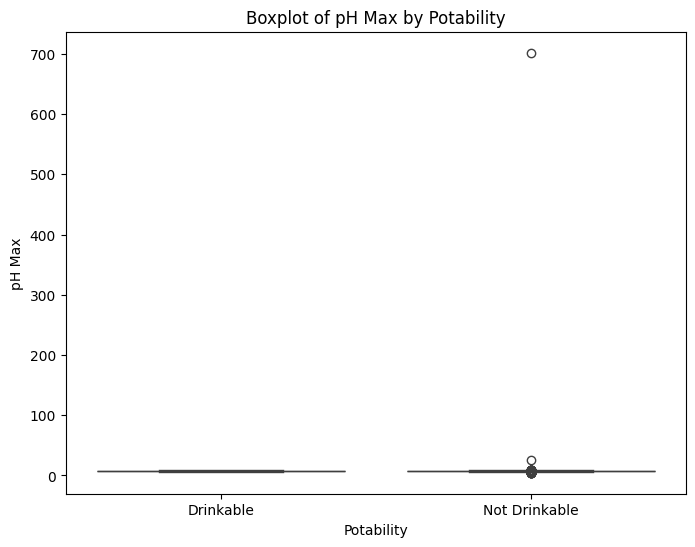

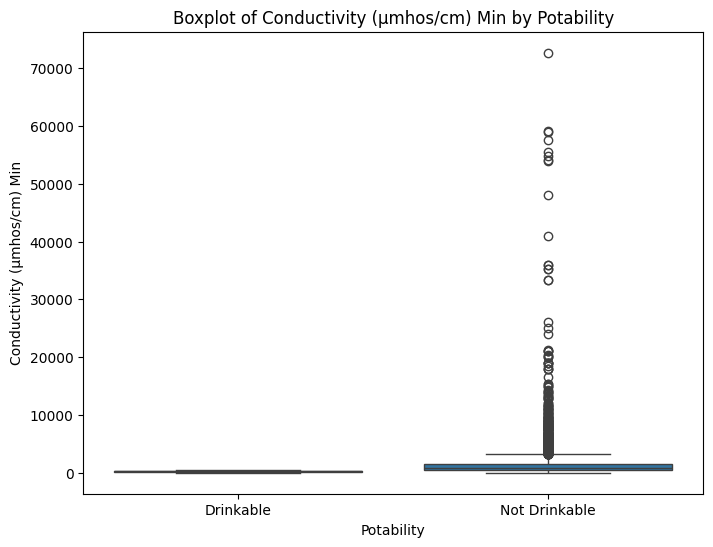

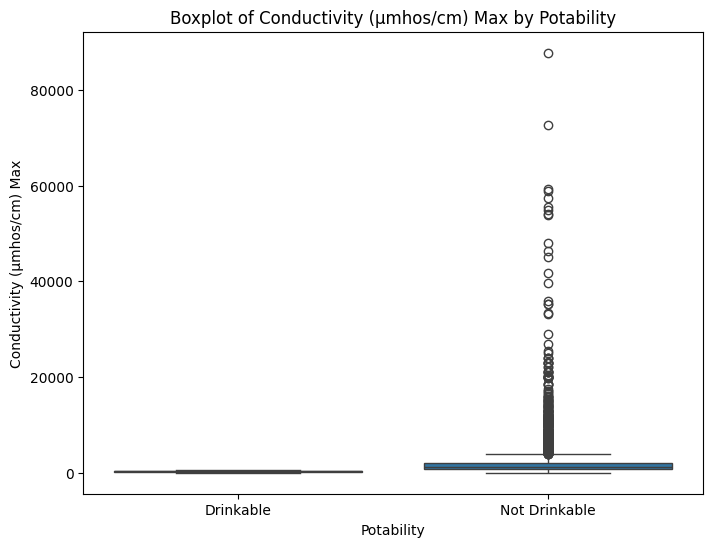

In [118]:
# prompt: plots to understand the relationship

# Pairplot to visualize relationships between numerical features and potability
sns.pairplot(Dataset, hue='Potability', vars=['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                                           'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max'])
plt.show()

# Boxplot to compare the distribution of features based on Potability
for feature in ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Potability', y=feature, data=Dataset)
  plt.title(f'Boxplot of {feature} by Potability')
  plt.show()


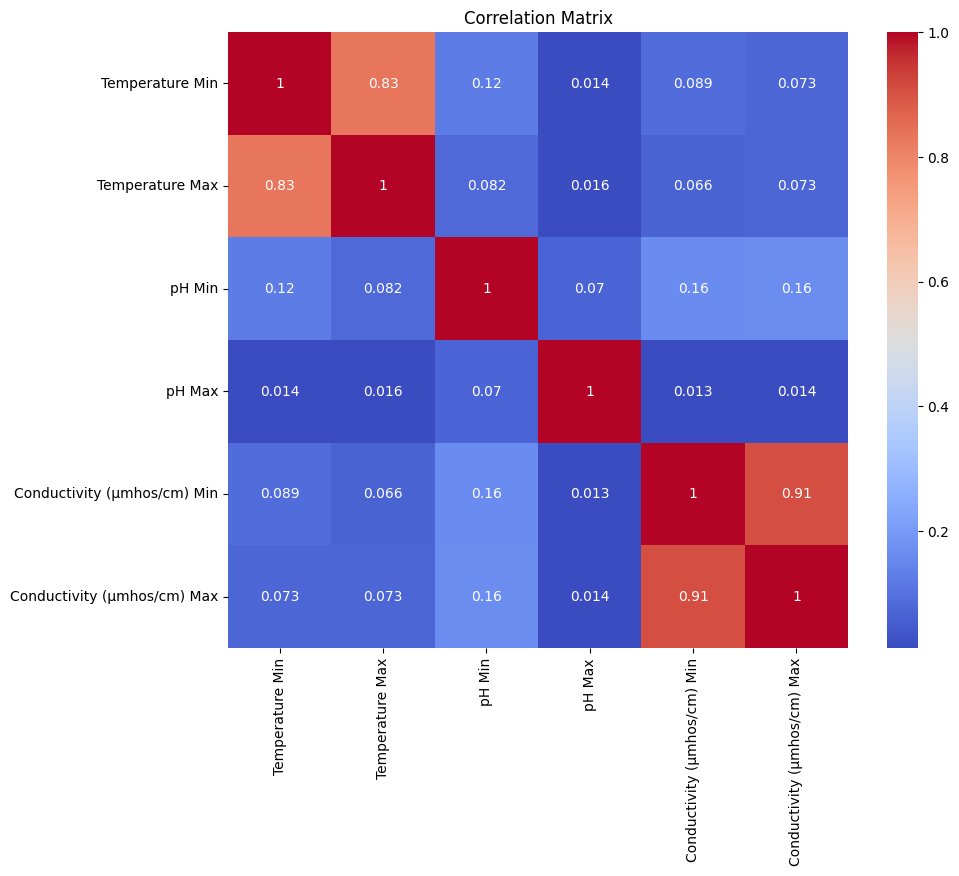

In [119]:
# Correlation matrix heatmap to understand relationships between numerical features
correlation_matrix = Dataset[['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                             'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##Missing Values Treatment


In [120]:
Dataset.isnull().sum()
#percentage of missing value
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899
Year,0.000000


##Outliers Treatment